In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Take train data

train_file = pd.read_csv("Dataset/train.csv")
print(train_file.isnull().sum())
print(train_file.duplicated().sum())



No                          0
material                    0
feedrate                    0
clamp_pressure              0
tool_condition              0
machining_finalized         0
passed_visual_inspection    4
dtype: int64
0


In [3]:
# Fill null values for "passed_visual_inspection"
train_file['passed_visual_inspection'] = train_file["passed_visual_inspection"].fillna("no")
print(train_file.isnull().sum())
print(train_file.duplicated().sum())


No                          0
material                    0
feedrate                    0
clamp_pressure              0
tool_condition              0
machining_finalized         0
passed_visual_inspection    0
dtype: int64
0


In [4]:
train_file.to_csv("Train_cleaned.csv")

In [5]:
import os
import glob
import pandas as pd

# Base folder where CSVs are located
base_folder = r"C:\Users\Velpr\Documents\Final_Project\Dataset"

# Load cleaned train data
Train_clean = pd.read_csv(r"C:\Users\Velpr\Documents\Final_Project\Train_cleaned.csv")

# Collect all experiment CSVs except 'train.csv'
csv_files = glob.glob(os.path.join(base_folder, "*.csv"), recursive=True)
csv_files = [file for file in csv_files if os.path.basename(file).lower() != "train.csv"]

# Initialize a list to collect merged data
raw_df = []

# Loop through all 18 expected experiments (experiment_01.csv to experiment_18.csv)
for i in range(1, 19):
    filename = f"experiment_{i:02d}.csv"
    filepath = os.path.join(base_folder, filename)
    
    if os.path.exists(filepath):
        exp_df = pd.read_csv(filepath)
        
        # Get the corresponding metadata row from train data
        combined_data = Train_clean[Train_clean["No"] == i]
        if combined_data.empty:
            print(f"No matching metadata for experiment {i}")
            continue
        
        # Repeat metadata to match the number of rows in experiment data
        Combined_data_repeated = pd.concat([combined_data] * len(exp_df), ignore_index=True)
        
        # Concatenate experiment data with its corresponding train metadata
        Merged_df = pd.concat([exp_df.reset_index(drop=True), Combined_data_repeated.reset_index(drop=True)], axis=1)
        
        # Append to the list
        raw_df.append(Merged_df)
    else:
        print(f"File not found: {filename}")

# Combine all the merged experiment + train metadata dataframes
Merged_df = pd.concat(raw_df, ignore_index=True)

# Output
print(Merged_df.head())
print("Final merged shape:", Merged_df.shape)


   X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
0              198.0                0.0                   0.00   
1              198.0              -10.8                -350.00   
2              196.0              -17.8                  -6.25   
3              194.0              -18.0                   0.00   
4              193.0              -17.9                 -18.80   

   X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
0               198.0                 0.0                0.000000   
1               198.0               -13.6             -358.000000   
2               196.0               -17.9               -0.000095   
3               194.0               -17.9               -0.000095   
4               192.0               -17.9                0.000095   

   X1_CurrentFeedback  X1_DCBusVoltage  X1_OutputCurrent  X1_OutputVoltage  \
0                0.18           0.0207             329.0              2.77   
1              -10.90           

In [6]:
Merged_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_CURRENT_FEEDRATE,Machining_Process,Unnamed: 0,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,50.0,Starting,0,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,50.0,Prep,0,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,50.0,Prep,0,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,50.0,Prep,0,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,50.0,Prep,0,1,wax,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25281,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,3.0,End,17,18,wax,3,2.5,worn,yes,yes
25282,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,3.0,End,17,18,wax,3,2.5,worn,yes,yes
25283,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,3.0,End,17,18,wax,3,2.5,worn,yes,yes
25284,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,3.0,End,17,18,wax,3,2.5,worn,yes,yes


In [7]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25286 non-null  flo

In [8]:
print(Merged_df.isnull().sum())
print(Merged_df.duplicated().sum())

X1_ActualPosition            0
X1_ActualVelocity            0
X1_ActualAcceleration        0
X1_CommandPosition           0
X1_CommandVelocity           0
X1_CommandAcceleration       0
X1_CurrentFeedback           0
X1_DCBusVoltage              0
X1_OutputCurrent             0
X1_OutputVoltage             0
X1_OutputPower               0
Y1_ActualPosition            0
Y1_ActualVelocity            0
Y1_ActualAcceleration        0
Y1_CommandPosition           0
Y1_CommandVelocity           0
Y1_CommandAcceleration       0
Y1_CurrentFeedback           0
Y1_DCBusVoltage              0
Y1_OutputCurrent             0
Y1_OutputVoltage             0
Y1_OutputPower               0
Z1_ActualPosition            0
Z1_ActualVelocity            0
Z1_ActualAcceleration        0
Z1_CommandPosition           0
Z1_CommandVelocity           0
Z1_CommandAcceleration       0
Z1_CurrentFeedback           0
Z1_DCBusVoltage              0
Z1_OutputCurrent             0
Z1_OutputVoltage             0
S1_Actua

In [9]:
Merged_df = Merged_df.drop_duplicates().reset_index(drop = True)
Merged_df.drop(columns = "Unnamed: 0",inplace= True)

print(Merged_df.duplicated().sum())

0


In [10]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24955 entries, 0 to 24954
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          24955 non-null  float64
 1   X1_ActualVelocity          24955 non-null  float64
 2   X1_ActualAcceleration      24955 non-null  float64
 3   X1_CommandPosition         24955 non-null  float64
 4   X1_CommandVelocity         24955 non-null  float64
 5   X1_CommandAcceleration     24955 non-null  float64
 6   X1_CurrentFeedback         24955 non-null  float64
 7   X1_DCBusVoltage            24955 non-null  float64
 8   X1_OutputCurrent           24955 non-null  float64
 9   X1_OutputVoltage           24955 non-null  float64
 10  X1_OutputPower             24955 non-null  float64
 11  Y1_ActualPosition          24955 non-null  float64
 12  Y1_ActualVelocity          24955 non-null  float64
 13  Y1_ActualAcceleration      24955 non-null  flo

In [11]:
Merged_df.head()
Merged_df.Machining_Process.unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'end',
       'End'], dtype=object)

In [12]:
Merged_df = Merged_df.replace('end', 'End')
Merged_df.Machining_Process.unique()

array(['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
       'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'End'],
      dtype=object)

In [ ]:
# # Save as CSV
# Merged_df.to_csv("Merged_Data.csv", index= False)

In [14]:
zero_columns = Merged_df.columns[(Merged_df == 0).all()]
print("Columns with all zero values:", zero_columns.tolist())


Columns with all zero values: ['Z1_CurrentFeedback', 'Z1_DCBusVoltage', 'Z1_OutputCurrent', 'Z1_OutputVoltage']


In [15]:
Merged_df = Merged_df.loc[:, (Merged_df != 0).any(axis=0)]


In [16]:
Merged_df

,X1_ActualPosition,X1_ActualVelocity,X1_ActualAcceleration,X1_CommandPosition,X1_CommandVelocity,X1_CommandAcceleration,X1_CurrentFeedback,X1_DCBusVoltage,X1_OutputCurrent,X1_OutputVoltage,...,M1_sequence_number,M1_CURRENT_FEEDRATE,Machining_Process,No,material,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
0,198.0,0.00,0.00,198.0,0.00,0.000000,0.18,0.0207,329.0,2.77,...,0.0,50.0,Starting,1,wax,6,4.0,unworn,yes,yes
1,198.0,-10.80,-350.00,198.0,-13.60,-358.000000,-10.90,0.1860,328.0,23.30,...,4.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
2,196.0,-17.80,-6.25,196.0,-17.90,-0.000095,-8.59,0.1400,328.0,30.60,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
3,194.0,-18.00,0.00,194.0,-17.90,-0.000095,-6.11,0.1300,327.0,30.30,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
4,193.0,-17.90,-18.80,192.0,-17.90,0.000095,-5.70,0.1140,328.0,30.50,...,7.0,50.0,Prep,1,wax,6,4.0,unworn,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24950,144.0,-2.30,100.00,144.0,-2.57,0.977000,-5.05,0.0732,327.0,9.56,...,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
24951,144.0,-2.47,25.00,144.0,-2.46,1.080000,-5.62,0.0996,327.0,10.30,...,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
24952,143.0,-2.20,81.20,143.0,-2.35,1.170000,-4.42,0.0539,327.0,7.79,...,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes
24953,143.0,-2.05,68.70,143.0,-2.23,1.260000,-5.83,0.0809,327.0,8.32,...,57.0,3.0,End,18,wax,3,2.5,worn,yes,yes


In [17]:
# Save as CSV
Merged_df.to_csv("Merged_Data.csv", index= False)

In [ ]:
# ## EDA  ##
# 1) outlier and detection
# 2) skewness & kurtosis
# 3) Standardisation / Normalization
# # 4) Model / visualization

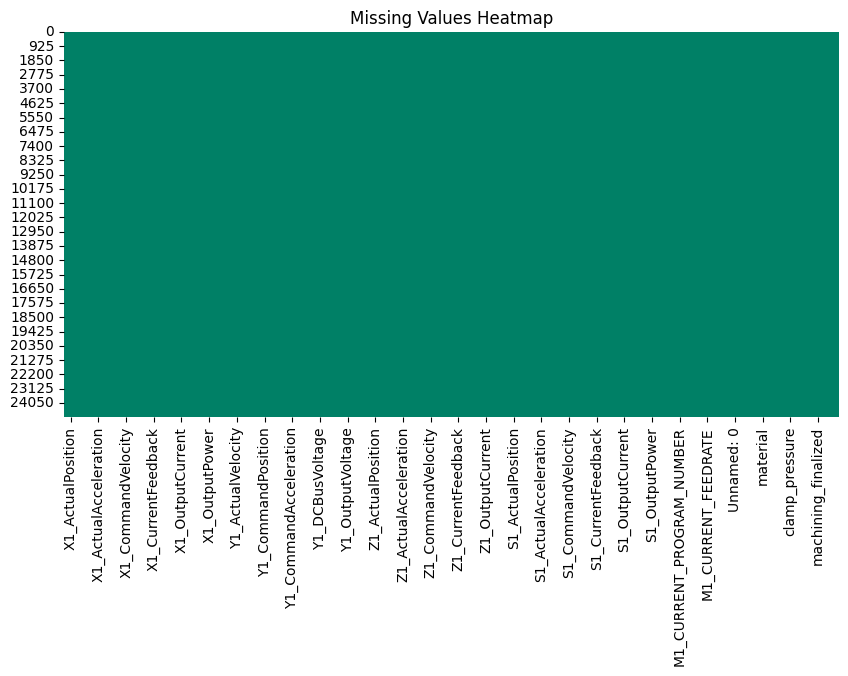

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# To check and visualize missing values

#print(Merged_df.isnull().sum())

plt.figure(figsize=(10, 5))
sns.heatmap(Merged_df.isnull(), cbar=False, cmap="summer")
plt.title("Missing Values Heatmap")
plt.show()



In [18]:
Merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24955 entries, 0 to 24954
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          24955 non-null  float64
 1   X1_ActualVelocity          24955 non-null  float64
 2   X1_ActualAcceleration      24955 non-null  float64
 3   X1_CommandPosition         24955 non-null  float64
 4   X1_CommandVelocity         24955 non-null  float64
 5   X1_CommandAcceleration     24955 non-null  float64
 6   X1_CurrentFeedback         24955 non-null  float64
 7   X1_DCBusVoltage            24955 non-null  float64
 8   X1_OutputCurrent           24955 non-null  float64
 9   X1_OutputVoltage           24955 non-null  float64
 10  X1_OutputPower             24955 non-null  float64
 11  Y1_ActualPosition          24955 non-null  float64
 12  Y1_ActualVelocity          24955 non-null  float64
 13  Y1_ActualAcceleration      24955 non-null  flo

In [19]:
numeric_cols = Merged_df.select_dtypes(include=['float64', 'int64'])


C:\Users\Velpr\AppData\Local\Temp\ipykernel_15688\2381974554.py:29: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(Merged_df[col].dropna(), fill=True, color='lightgreen', ax=axes[i, 1])


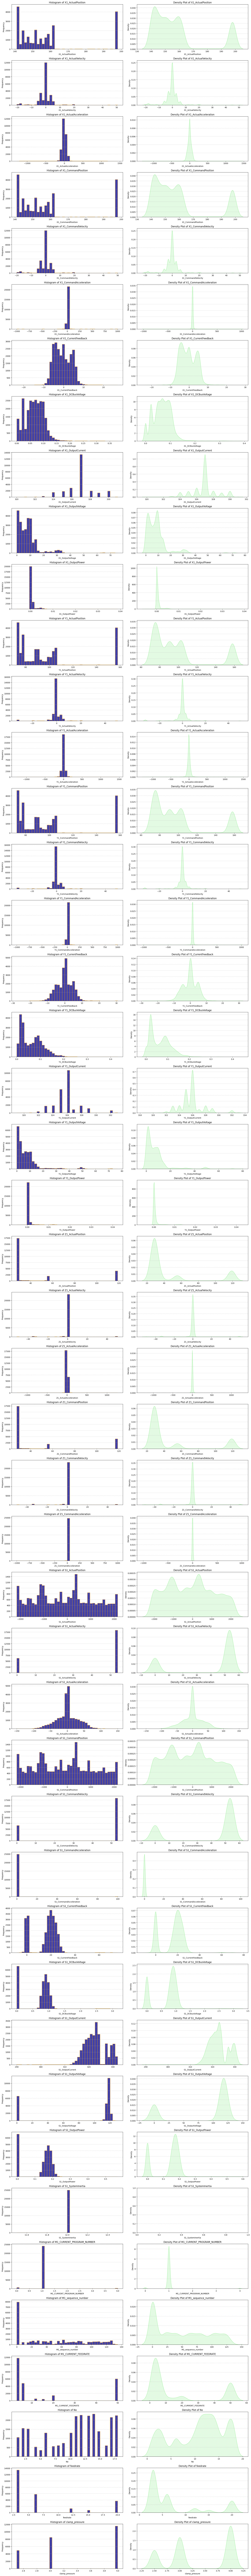

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make sure you're selecting only 10 columns
selected_cols = numeric_cols[:10]  # numeric_cols must be a list of column names
#numeric_cols = list(numeric_cols)
num_cols = len(list(selected_cols))


# Create subplots: 10 rows, 2 columns (Histogram + KDE)
fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(18, num_cols * 4))

# Ensure axes is a 2D NumPy array even if num_cols == 1
if num_cols == 1:
    axes = np.array([axes])

# Loop only over selected 10 columns
for i, col in enumerate(selected_cols):
    # Histogram
    sns.histplot(Merged_df[col].dropna(), bins=40, kde=False,
                 color='darkblue', edgecolor='orange', ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {col}', fontsize=12)
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].grid(axis='y', linestyle='--', alpha=0.7)

    # KDE Plot
    sns.kdeplot(Merged_df[col].dropna(), fill=True, color='lightgreen', ax=axes[i, 1])
    axes[i, 1].set_title(f'Density Plot of {col}', fontsize=12)
    axes[i, 1].set_xlabel(col)
    axes[i, 1].set_ylabel('Density')
    axes[i, 1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


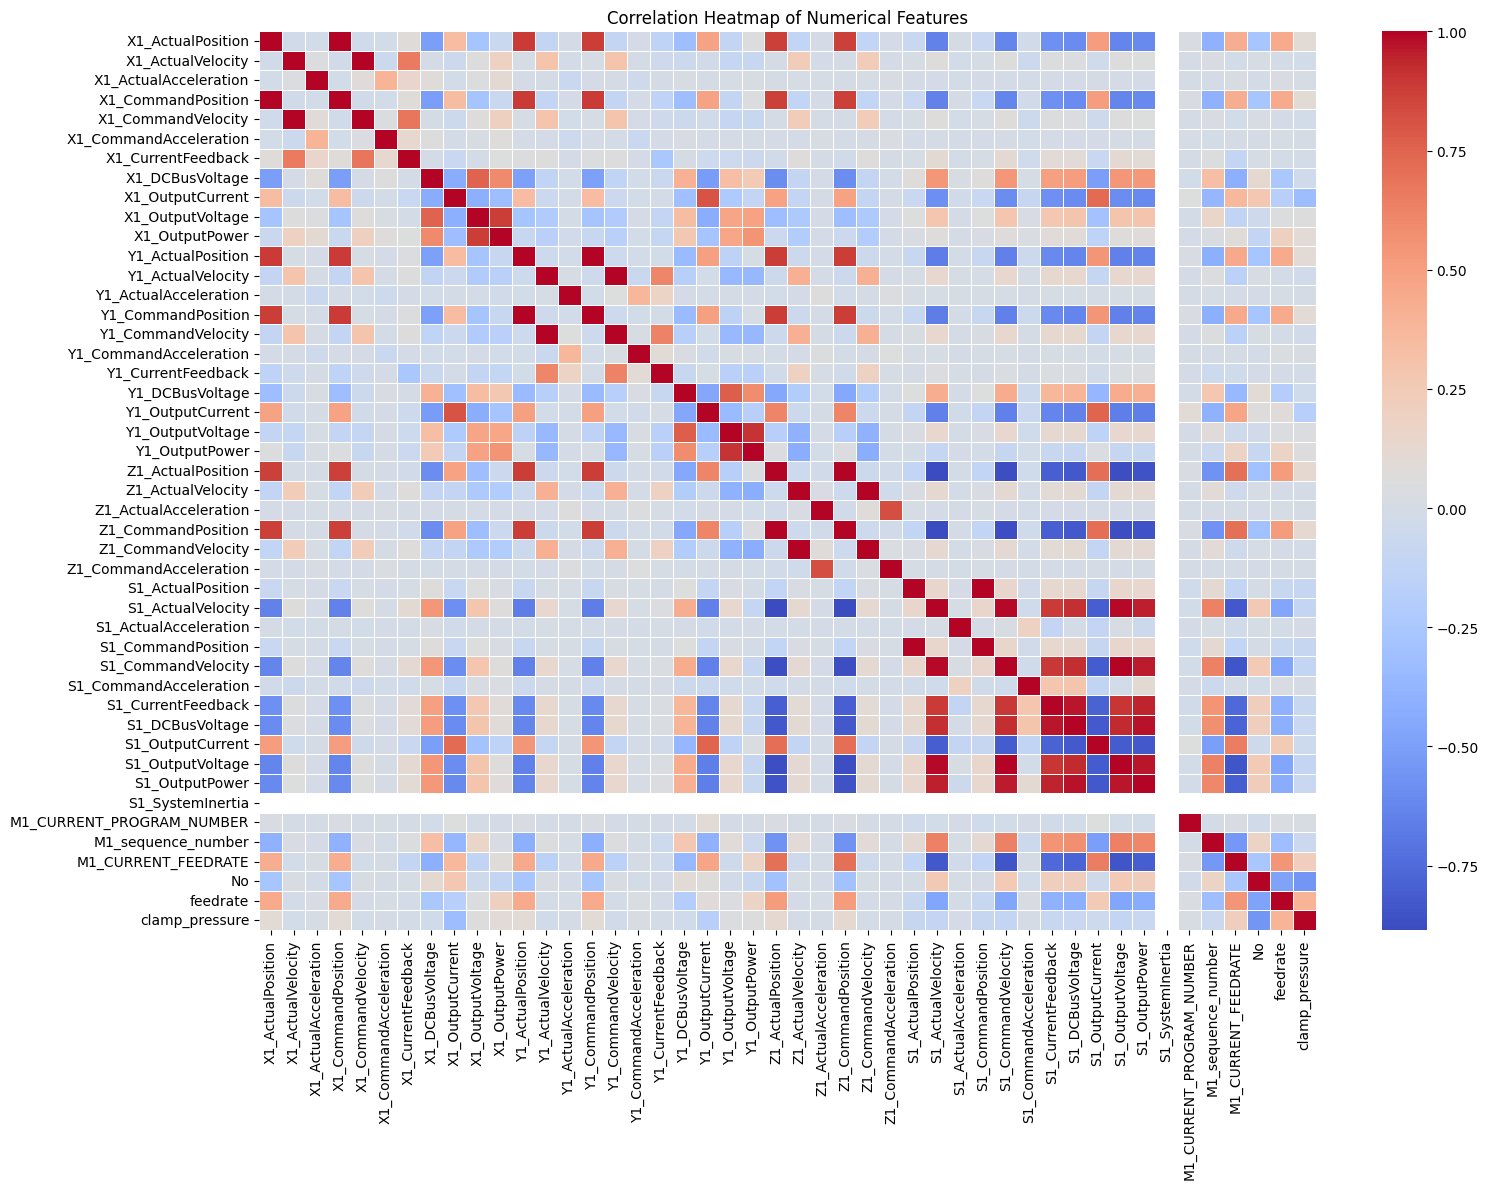

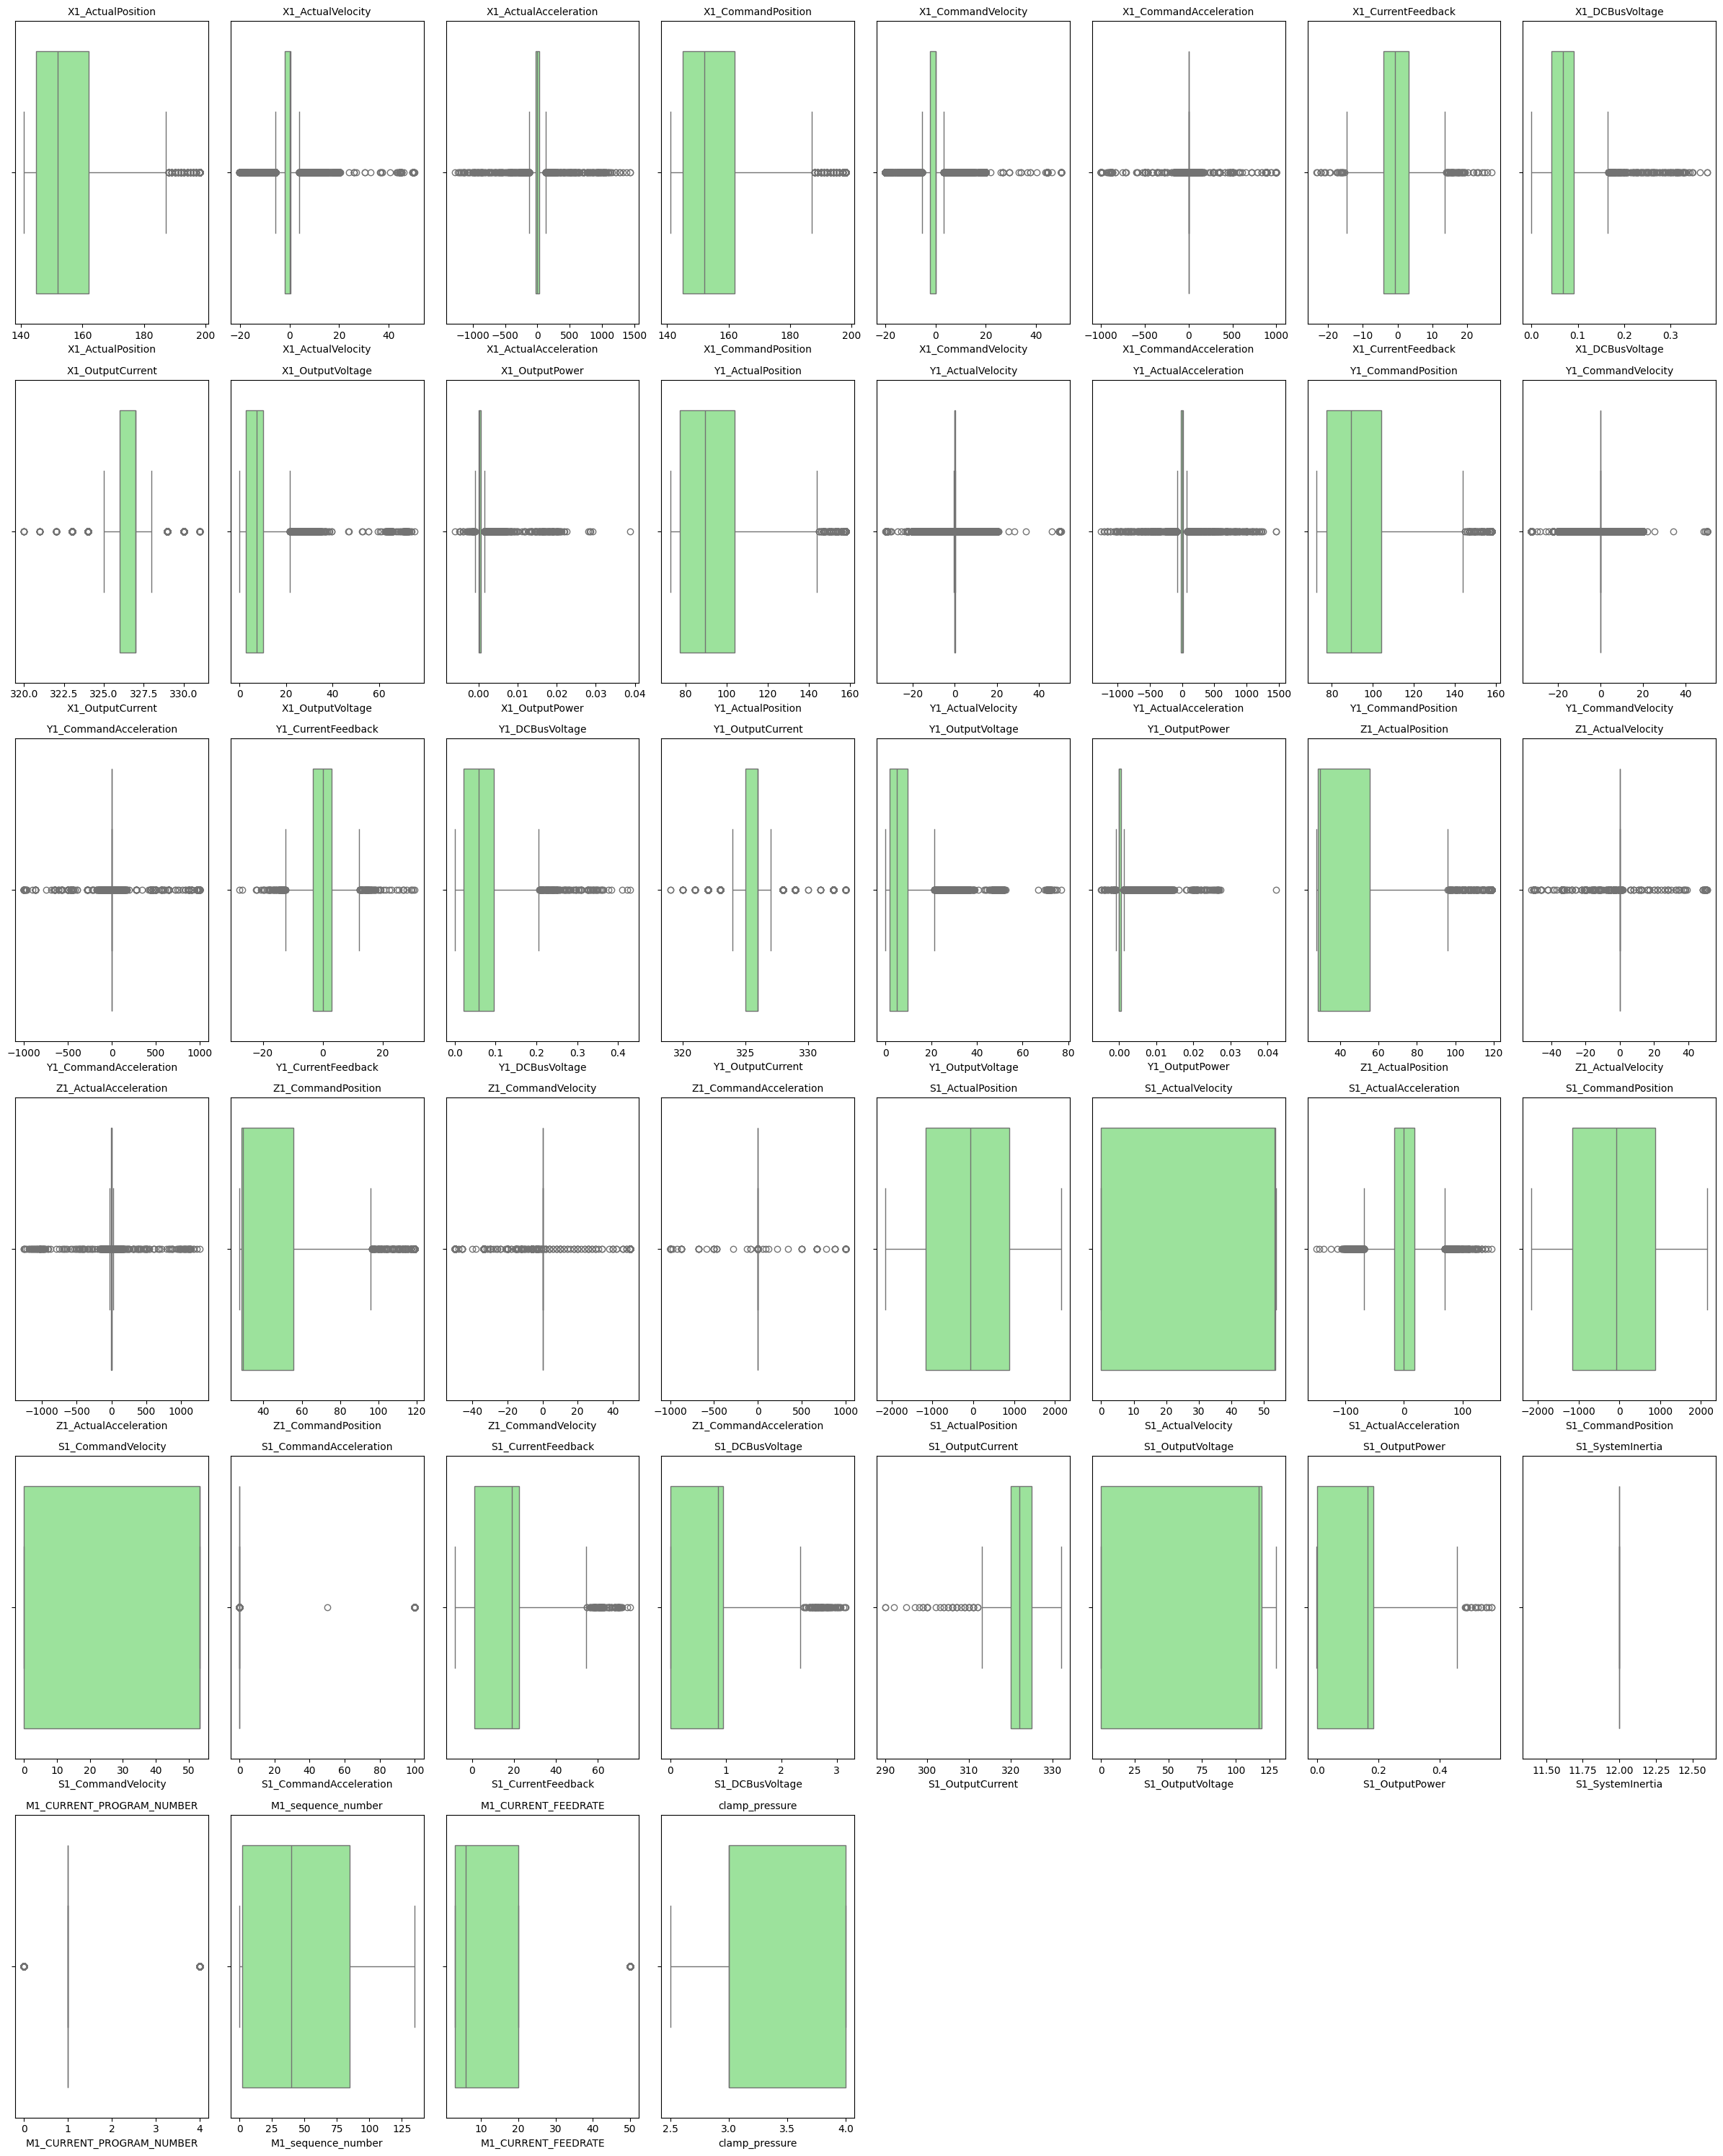

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Merged_df = pd.read_csv("Merged_Data.csv")

correlation_matrix = Merged_df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Boxplots for outlier detection (sample columns)
numeric_columns = Merged_df.select_dtypes(include='float64').columns
sample_columns = numeric_columns[:47] 

plt.figure(figsize=(24, 30))
for i, col in enumerate(sample_columns, 1):
    plt.subplot(6, 8, i)
    sns.boxplot(x=Merged_df[col], color='lightgreen')
    plt.title(col, fontsize=10)
    plt.tight_layout()

plt.show()

In [ ]:
from scipy.stats import zscore

# Select only numeric columns
numeric_cols = Merged_df.select_dtypes(include='float64').columns

# Compute z-scores
z_scores = Merged_df[numeric_cols].apply(zscore)

# Detect outliers: any z-score > 3 or < -3
outlier_mask = (z_scores.abs() > 3)

# Count how many outliers per column
outlier_counts = outlier_mask.sum()
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))  

X1_CommandVelocity           1033
X1_ActualVelocity            1020
Z1_CommandVelocity            839
Z1_ActualVelocity             835
Y1_ActualVelocity             809
Y1_CommandVelocity            803
Y1_OutputCurrent              669
Y1_OutputVoltage              648
Y1_OutputPower                610
X1_OutputVoltage              537
X1_OutputPower                373
Y1_ActualAcceleration         335
Y1_CommandAcceleration        299
X1_ActualAcceleration         277
M1_CURRENT_PROGRAM_NUMBER     249
X1_CommandAcceleration        234
X1_DCBusVoltage               167
Z1_ActualAcceleration         152
Y1_DCBusVoltage               146
Z1_CommandAcceleration        121
Y1_CurrentFeedback            113
X1_CurrentFeedback            109
S1_CommandAcceleration         98
S1_DCBusVoltage                96
S1_CurrentFeedback             95
S1_ActualAcceleration          91
X1_OutputCurrent               42
S1_OutputPower                 33
S1_OutputCurrent               29
dtype: int64


c:\Users\Velpr\Documents\Final_Project\cnc.venv\lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


In [39]:
obj_column = Merged_df.select_dtypes(include= 'object')
obj_column

,Machining_Process,material,tool_condition,machining_finalized,passed_visual_inspection
0,Starting,wax,unworn,yes,yes
1,Prep,wax,unworn,yes,yes
2,Prep,wax,unworn,yes,yes
3,Prep,wax,unworn,yes,yes
4,Prep,wax,unworn,yes,yes
...,...,...,...,...,...
24950,End,wax,worn,yes,yes
24951,End,wax,worn,yes,yes
24952,End,wax,worn,yes,yes
24953,End,wax,worn,yes,yes


In [44]:
# Control outliers

from scipy.stats.mstats import winsorize

def iqr_winsor_cap(series, win_limit=0.01):
    # Step 1: Winsorize the series (trim 1% from both tails)
    winsorized_series = winsorize(series, limits=[win_limit, win_limit])
    winsorized_series = pd.Series(winsorized_series, index=series.index)  # Keep index alignment

    # Step 2: Apply IQR capping on winsorized data
    Q1 = winsorized_series.quantile(0.25)
    Q3 = winsorized_series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return winsorized_series.clip(lower, upper)


for col in Merged_df.select_dtypes(include='number').columns:
    Merged_df[col] = iqr_winsor_cap(Merged_df[col])



c:\Users\Velpr\Documents\Final_Project\cnc.venv\lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Velpr\Documents\Final_Project\cnc.venv\lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Velpr\Documents\Final_Project\cnc.venv\lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Velpr\Documents\Final_Project\cnc.venv\lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\Velpr\Documents\Final_Project\cnc.venv\lib\site-packages\numpy\lib\_function_base_impl.py:4842: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Us

In [45]:
# Verifying outliers count
from scipy.stats import zscore

# Select only numeric columns
numeric_cols = Merged_df.select_dtypes(include='float64').columns

# Compute z-scores
z_scores = Merged_df[numeric_cols].apply(zscore)

# Detect outliers: any z-score > 3 or < -3
outlier_mask = (z_scores.abs() > 3)

# Count how many outliers per column
outlier_counts = outlier_mask.sum()
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))


Series([], dtype: int64)


c:\Users\Velpr\Documents\Final_Project\cnc.venv\lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
c:\Users\Velpr\Documents\Final_Project\cnc.venv\lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


C:\Users\Velpr\AppData\Local\Temp\ipykernel_15688\3832735234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Merged_df, x='tool_condition', palette='Set2')


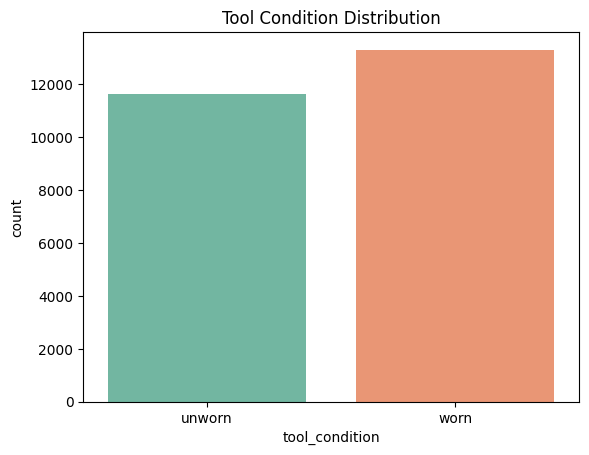

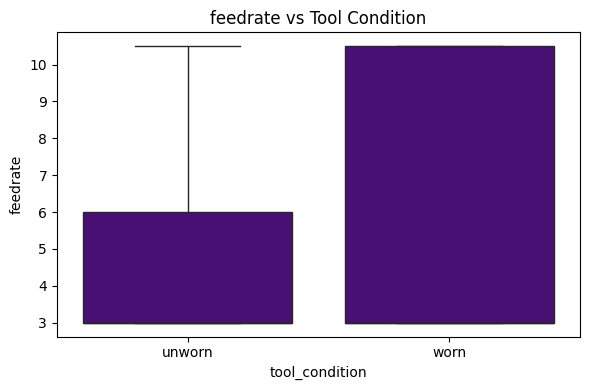

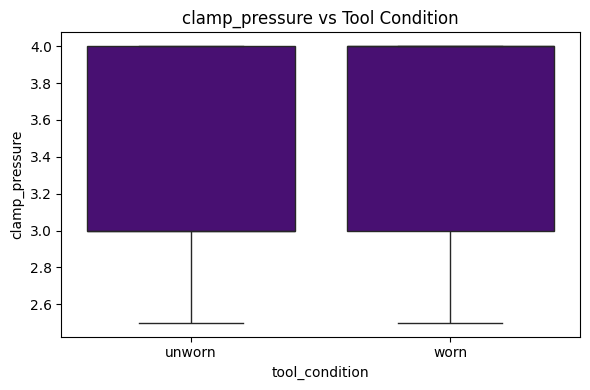

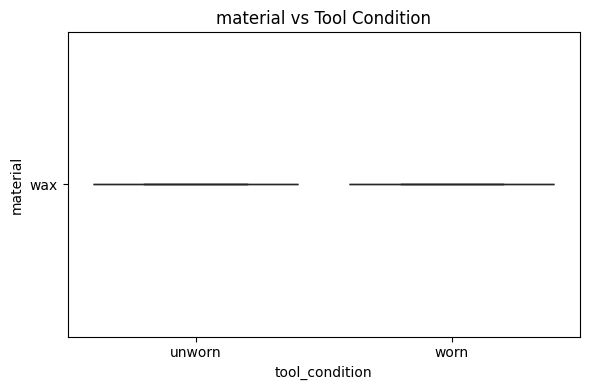

In [48]:
#  Countplot for Target Distribution

sns.countplot(data=Merged_df, x='tool_condition', palette='Set2')
plt.title("Tool Condition Distribution")
plt.show()

features = ['feedrate', 'clamp_pressure', 'vibration', 'material', 'spindle_speed']

for col in features:
    if col in Merged_df.columns:
        plt.figure(figsize=(6, 4))
        #sns.boxplot(x='tool_condition', y=col, data=Merged_df, palette='indigo')
        sns.boxplot(x='tool_condition', y=col, data=Merged_df, color='indigo')
        plt.title(f'{col} vs Tool Condition')
        plt.tight_layout()
        plt.show()




In [42]:
from sklearn.preprocessing import LabelEncoder

# Example array
labels = ['Starting', 'Prep', 'Layer 1 Up', 'Layer 1 Down', 'Repositioning',
          'Layer 2 Up', 'Layer 2 Down', 'Layer 3 Up', 'Layer 3 Down', 'End']

# Convert to pandas Series or array
import numpy as np
labels = np.array(labels)

# Apply LabelEncoder
le = LabelEncoder()
numeric_labels = le.fit_transform(labels)

print("Encoded:", numeric_labels)
print("Mapping:", dict(zip(le.classes_, range(len(le.classes_)))))


Encoded: [9 7 2 1 8 4 3 6 5 0]
Mapping: {np.str_('End'): 0, np.str_('Layer 1 Down'): 1, np.str_('Layer 1 Up'): 2, np.str_('Layer 2 Down'): 3, np.str_('Layer 2 Up'): 4, np.str_('Layer 3 Down'): 5, np.str_('Layer 3 Up'): 6, np.str_('Prep'): 7, np.str_('Repositioning'): 8, np.str_('Starting'): 9}


In [45]:
numeric_labels.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'